<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.5 Summary and Problems](chapter24.05-Summary-and-Problems.ipynb) >

# FFT in Python

In Python, there are very mature FFT functions both in *numpy* and _scipy_. In this section, we will take a look of both packages and see how we can easily use them in our work. Let's first generate the signal as before. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

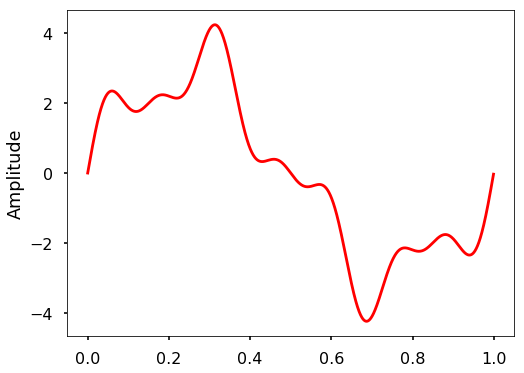

In [2]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

## FFT in Numpy

**EXAMPLE:** Use *fft* and _ifft_ function from *numpy* to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the _fft_ function using this 2000 length signal. 

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


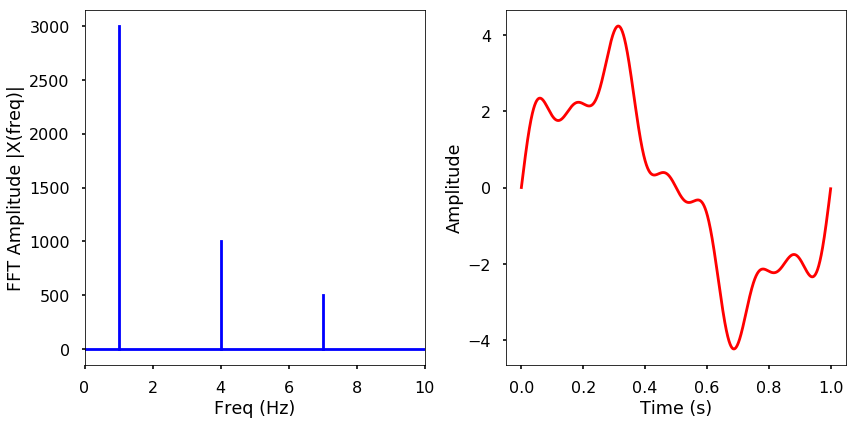

In [3]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [4]:
%timeit fft(x)

42.3 µs ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## FFT in Scipy

**EXAMPLE:** Use *fft* and _ifft_ function from *scipy* to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the _fft_ function using this 2000 length signal. 

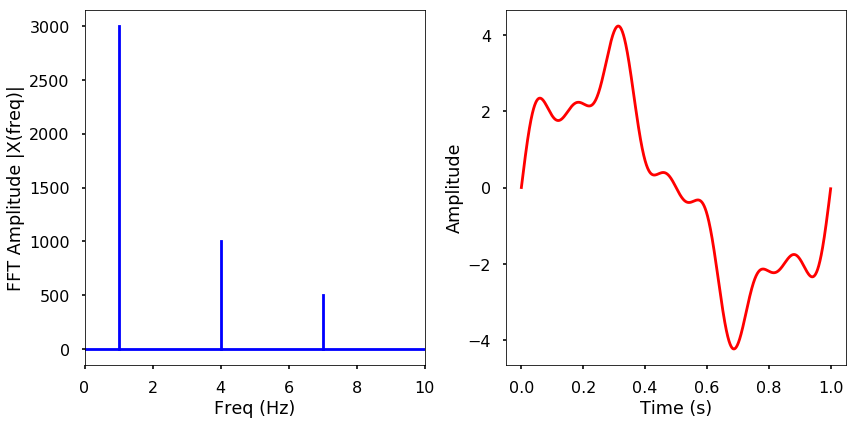

In [5]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [6]:
%timeit fft(x)

12.6 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now we can see that the built-in fft functions are much faster and easy to use, especially for the scipy version. Here is the results for comparison:

* Implemented DFT: 120 ms
* Implemented FFT: 16.9 ms
* Numpy FFT: 42.3 µs
* Scipy FFT: 12.6 µs

<!--NAVIGATION-->
< [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.5 Summary and Problems](chapter24.05-Summary-and-Problems.ipynb) >